In [1]:
!pip install import-ipynb
import import_ipynb


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# import import_mpii
# activities_set = import_mpii.activities_set
#
# train_loader =  import_mpii.train_loader
# val_loader = import_mpii.val_loader
# test_loader = import_mpii.test_loader
# label_encoder = import_mpii.label_encoder
# num_classes = import_mpii.num_classes

I: 0. Filename ./content/pushups/images?q=tbn:ANd9GcQEPdgAxD-pT2WYA42SNVz-u-BJAlV1GCiFrg&s act Name: ['down']
I: 1. Filename ./content/pushups/images?q=tbn:ANd9GcTX-r6Ei_3KYDcb7TTe5qRF6yQx4508QzIRsg&s act Name: ['down']
I: 2. Filename ./content/pushups/images?q=tbn:ANd9GcR6xGhGvSOPx_bF4KDpPnHxyyR7NZ-1K8l4qw&s act Name: ['down']
I: 3. Filename ./content/pushups/images?q=tbn:ANd9GcTFOQJYUGQmzYHVeYTdPAtoDqz_TM6npQzDeA&s act Name: ['down']
I: 4. Filename ./content/pushups/images?q=tbn:ANd9GcQEgdrLOn_W_5-U9Epr4vO9hqFlq4Vev5u5zw&s act Name: ['down']
I: 5. Filename ./content/pushups/images?q=tbn:ANd9GcTBUM-F2q6fg64a09jOJtq__ZlC84iIcr_LEw&s act Name: ['down']
I: 6. Filename ./content/pushups/images?q=tbn:ANd9GcS0ZhEL4QEhahDsOw5afvAlttpPqV8F1U81Rw&s act Name: ['down']
I: 7. Filename ./content/pushups/images?q=tbn:ANd9GcT2alZKH9UFQ6_H7HeepLPPAt6XWeGjlJexng&s act Name: ['down']
I: 8. Filename ./content/pushups/images?q=tbn:ANd9GcTWmEWo9vEmrBaOsmoFAr4z5fe4OKjR5DeRrw&s act Name: ['down']
I: 9. File

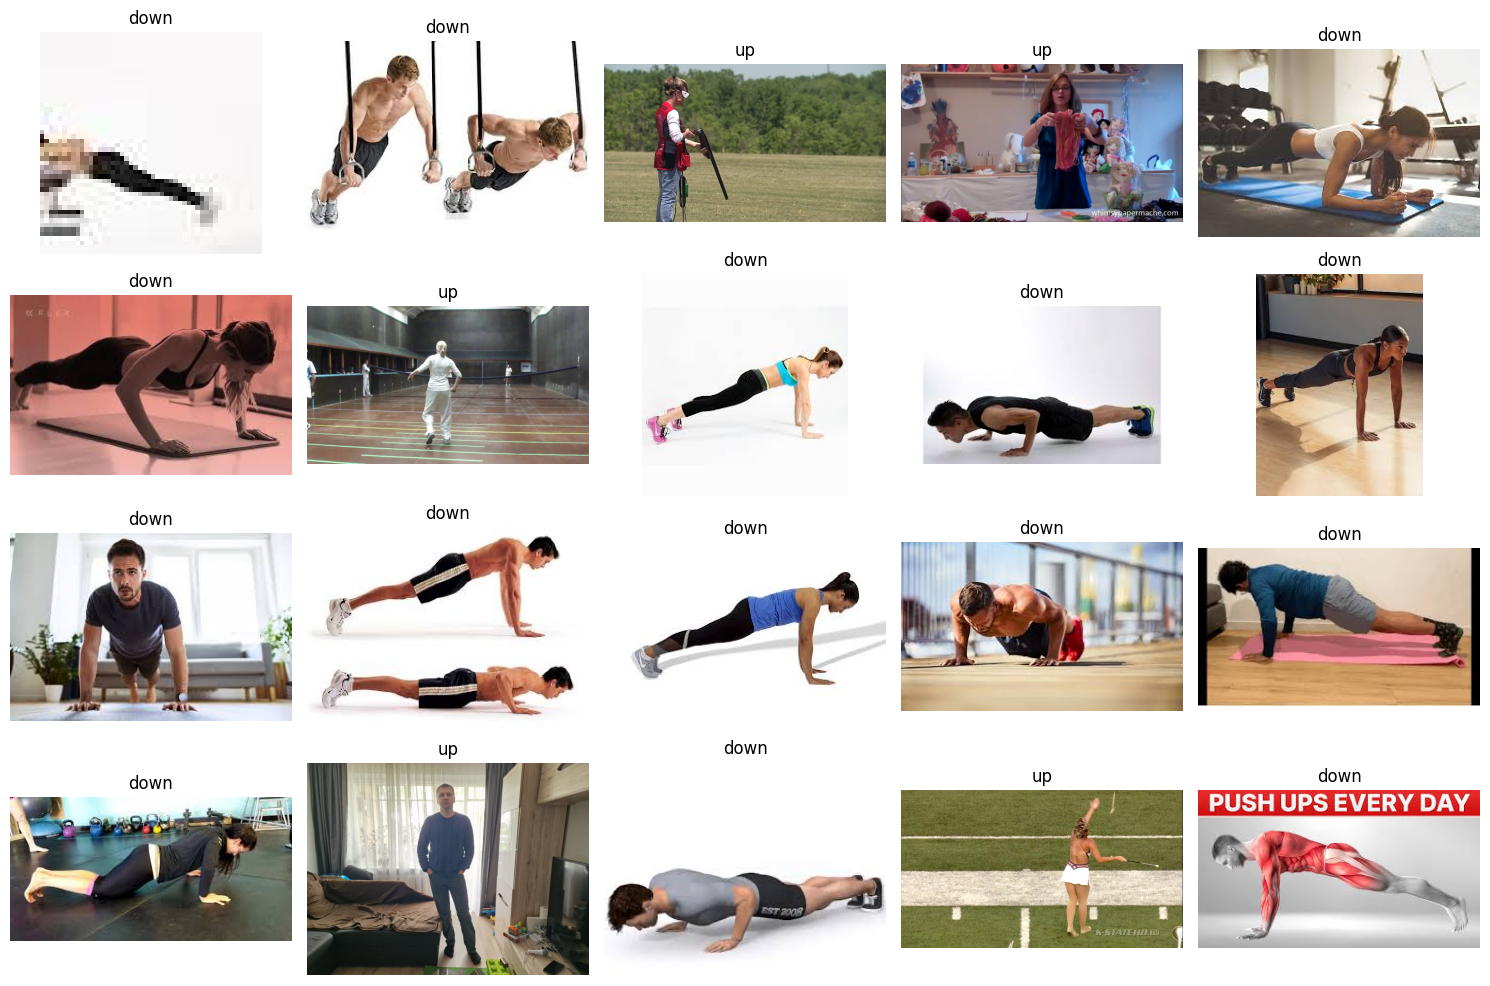

Category: down, Count: 688
Category: up, Count: 522


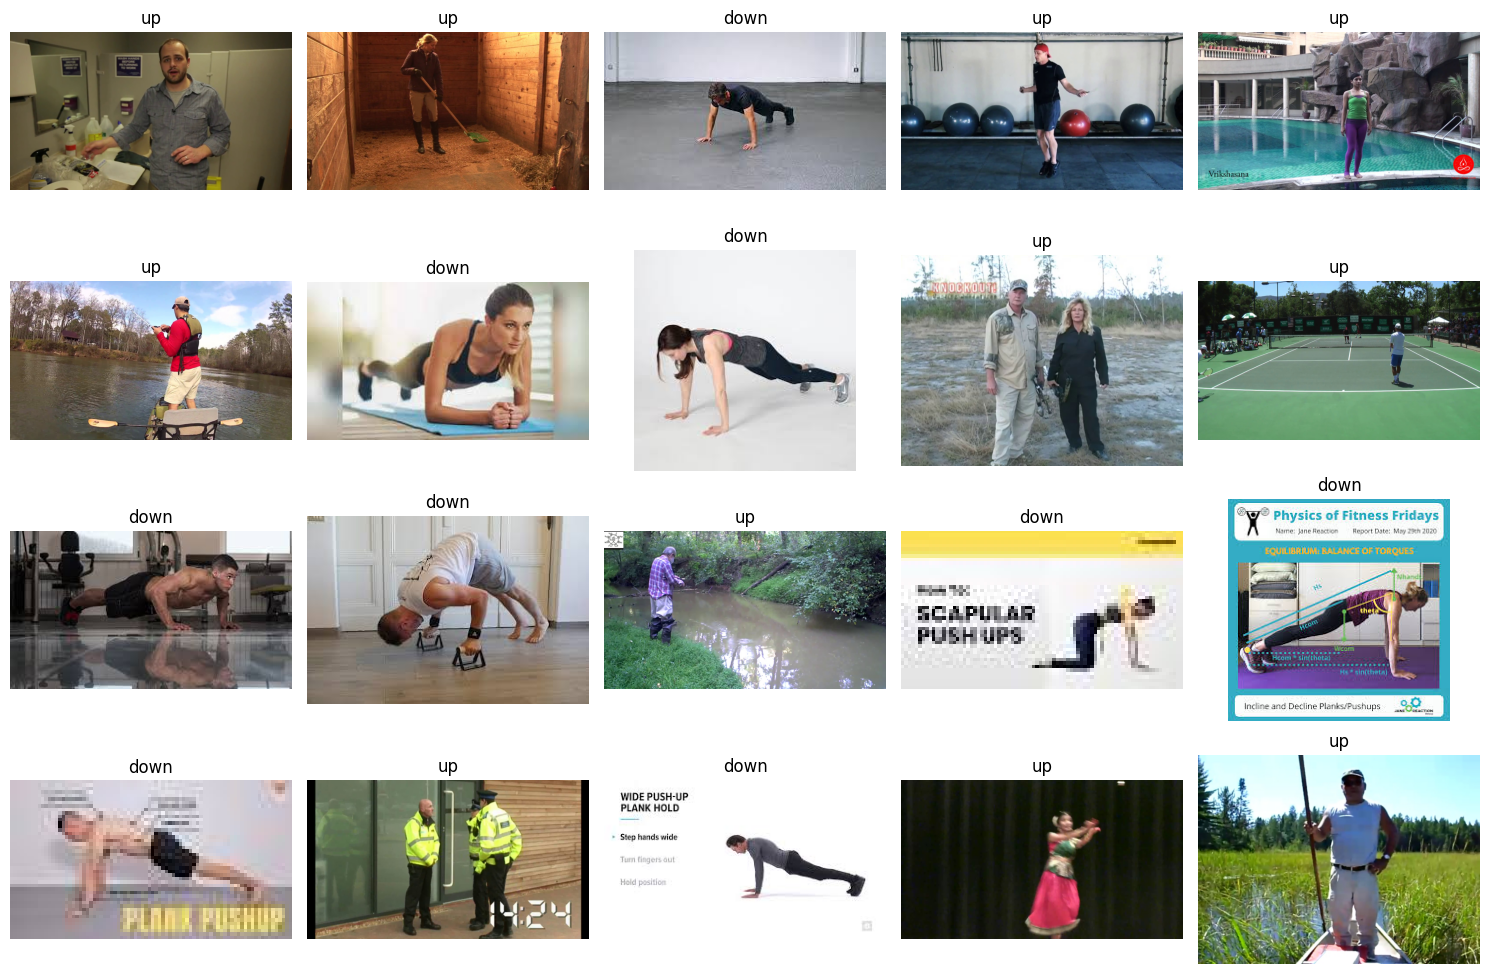

Filtered dataset size: 1210
[('./content/standing/009804454.jpg', ['up']), ('./content/standing/018927350.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcQ-4-ABza0kSIE3x7u1gEl0B3mtQH3DELeQgQ&s', ['down']), ('./content/standing/010427776.jpg', ['up']), ('./content/standing/007308156.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcRU3Agm-zBo5AqqQYpQMzXIng0VcgavRTjRaA&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcSSLHj14iuypNcnaenqdF5nT-GGudXRmgfWqQ&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcQ7xlTnX5f4vUM1OWLCX1eIN333QBvhUFA-DQ&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcQbi4i3Unzc02XSK9j24kq1a0ts0PpHzqMEEQ&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcSJjAWnvHwmErffjAJzc4VXiuFMDYUJSuRDJg&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcTHVn06qks-POm7xWhbs3Pw0r8FUZLJz2Njuw&s', ['down']), ('./content/standing/013730003.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcR_-ZMYVD_4uS1qTxg0lckU7hvuuqgwW1G2Fw&s', ['down']), ('./content/p

In [3]:
import import_selected
activities_set = import_selected.activities_set

train_loader =  import_selected.train_loader
val_loader = import_selected.val_loader
test_loader = import_selected.test_loader
label_encoder = import_selected.label_encoder
num_classes = import_selected.num_classes

In [4]:
# import import_coco
#
# train_loader =  import_coco.train_loader
# val_loader = import_coco.val_loader
# test_loader = None

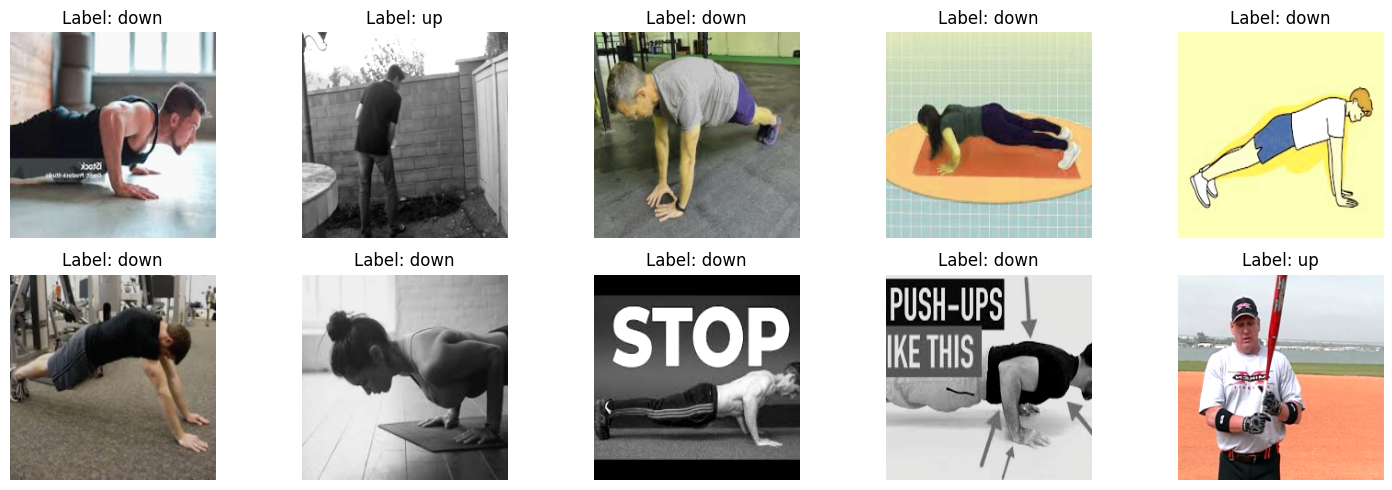

In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Function to visualize 10 images with labels
def visualize_images_with_labels(train_loader, label_encoder):
    # Get a batch of data
    data_iter = iter(train_loader)
    images, labels = next(data_iter)

    # Reverse normalization for visualization
    inv_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    images = [inv_normalize(img).permute(1, 2, 0).numpy() for img in images[:10]]

    # Plot 10 images with labels
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {label_encoder.inverse_transform([labels[i].item()])[0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_images_with_labels(train_loader, import_selected.label_encoder)

In [6]:
import torch
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

Using device: cuda


In [7]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import copy


def train_model(train_loader, val_loader, test_loader, model_class, epochs=5, save_file_name="best.pt"):
    # Initialize the model, loss function, and optimizer
    model = model_class(2)
    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.0001)
    #optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_acc = 0
    best_model_copy = None

    # Training loop
    for epoch in range(epochs):
        model.train()
        print("training... 💪")
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

            if batch_idx % 10 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()
        print("evaluating... !!!")
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(DEVICE), target.to(DEVICE)
                outputs = model(data)
                loss = criterion(outputs, target)
                val_loss += loss.item()

                predicted = torch.argmax(outputs, dim=1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        train_losses.append(val_loss)

        val_loss /= len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = model.state_dict()
            torch.save(best_weights, save_file_name)
            print(f"Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾")
            #save the best model copy into the best_model_copy variable
            best_model_copy = copy.deepcopy(model)


        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {running_loss / len(train_loader):.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}%, Validation Loss: {val_loss:.4f}, "
              f"Validation Accuracy: {val_accuracy:.4f}%  Best so far: {best_val_acc:.4f}%")

    # Test evaluation
    print("\nEvaluating on test dataset...")
    best_model_copy.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            outputs = best_model_copy(data)
            loss = criterion(outputs, target)
            test_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses[1:], label='Training Loss')
    plt.plot(val_losses[1:], label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

    return best_val_acc, model

training... 💪
Epoch [1/50], Batch [1/31], Loss: 0.6968
Epoch [1/50], Batch [11/31], Loss: 0.6804
Epoch [1/50], Batch [21/31], Loss: 0.7342
Epoch [1/50], Batch [31/31], Loss: 0.6751
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 1/50, Train Loss: 0.9393, Train Accuracy: 56.7149%, Validation Loss: 0.9672, Validation Accuracy: 61.1570%  Best so far: 61.1570%
training... 💪
Epoch [2/50], Batch [1/31], Loss: 0.6999
Epoch [2/50], Batch [11/31], Loss: 0.7074
Epoch [2/50], Batch [21/31], Loss: 0.6619
Epoch [2/50], Batch [31/31], Loss: 0.7660
evaluating... !!!
Epoch 2/50, Train Loss: 0.6767, Train Accuracy: 61.7769%, Validation Loss: 0.8115, Validation Accuracy: 58.6777%  Best so far: 61.1570%
training... 💪
Epoch [3/50], Batch [1/31], Loss: 0.6917
Epoch [3/50], Batch [11/31], Loss: 0.6200
Epoch [3/50], Batch [21/31], Loss: 0.6573
Epoch [3/50], Batch [31/31], Loss: 0.7487
evaluating... !!!
Epoch 3/50, Train Loss: 0.6411, Train Accuracy: 65.8058%, Validation Loss: 0.7641, Validat

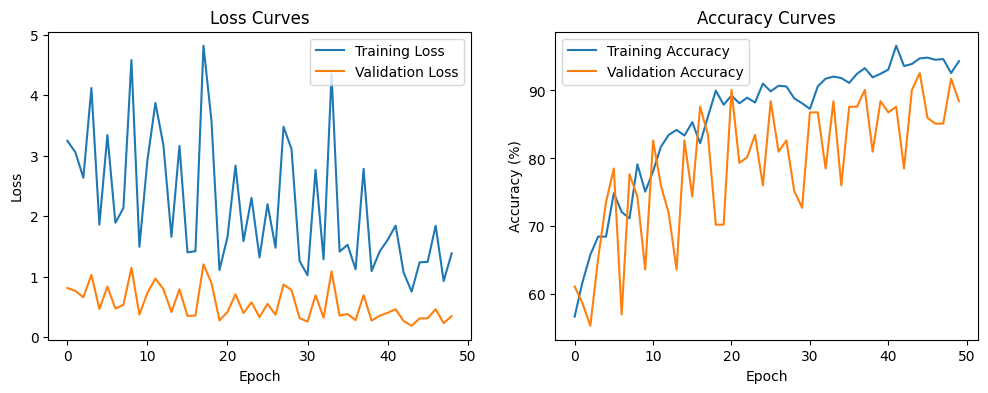

In [8]:
import torch
from models import BiTLikeModel
torch.cuda.empty_cache()
best_val_acc, model = train_model(train_loader, val_loader, test_loader, model_class=BiTLikeModel, epochs=50, save_file_name="BiTLikeModel.pt")

In [9]:
from inferring import test_image, load_model
from models import BiTLikeModel

#testuojam
load_model("BiTLikeModel.pt", BiTLikeModel)

# atsispaudzia
image_path = 'test_data/ats1.jpeg'
test_image(image_path)
image_path = 'test_data/ats2.jpeg'
test_image(image_path)

print("=======================")

# stovi
image_path = 'test_data/stov1.jpg'
test_image(image_path)
image_path = 'test_data/stov2.jpg'
test_image(image_path)

Using device-------------------: cuda
Model loaded successfully!
Using device: cuda
output: tensor([[ 1.4181, -1.4894]], device='cuda:0')
probabilities: tensor([[0.9482, 0.0518]], device='cuda:0')
Predicted class index: 0, Probability: 0.9482
Using device: cuda
output: tensor([[ 2.8665, -2.8901]], device='cuda:0')
probabilities: tensor([[0.9968, 0.0032]], device='cuda:0')
Predicted class index: 0, Probability: 0.9968
Using device: cuda
output: tensor([[-3.4310,  3.7273]], device='cuda:0')
probabilities: tensor([[7.7776e-04, 9.9922e-01]], device='cuda:0')
Predicted class index: 1, Probability: 0.9992
Using device: cuda
output: tensor([[-3.2324,  3.5056]], device='cuda:0')
probabilities: tensor([[0.0012, 0.9988]], device='cuda:0')
Predicted class index: 1, Probability: 0.9988


(1, 0.9988164901733398)

In [10]:
#testuojam su savo duomenimis

# atsispaudzia
test_image("content/pushups/DSC_0535.JPG")
test_image("content/pushups/DSC_0533.JPG")

print("=======================")

# stovi
test_image("content/standing/20250430_141003.jpg")
test_image("content/standing/20250430_141036.jpg")

Using device: cuda
output: tensor([[-1.1180,  1.2150]], device='cuda:0')
probabilities: tensor([[0.0884, 0.9116]], device='cuda:0')
Predicted class index: 1, Probability: 0.9116
Using device: cuda
output: tensor([[ 2.4138, -2.5547]], device='cuda:0')
probabilities: tensor([[0.9931, 0.0069]], device='cuda:0')
Predicted class index: 0, Probability: 0.9931
Using device: cuda
output: tensor([[-0.8051,  0.8518]], device='cuda:0')
probabilities: tensor([[0.1602, 0.8398]], device='cuda:0')
Predicted class index: 1, Probability: 0.8398
Using device: cuda
output: tensor([[-1.4263,  1.6203]], device='cuda:0')
probabilities: tensor([[0.0454, 0.9546]], device='cuda:0')
Predicted class index: 1, Probability: 0.9546


(1, 0.9546350240707397)